# Lead Score - Case Study

## Problem Statement

An X Education needs assistance in choosing the leads that have the best chance of becoming paying clients. The business wants us to develop a model in which each lead is given a lead score, with higher lead scores indicating a higher likelihood of conversion and lower lead scores indicating a lower likelihood of conversion. The desired lead conversion rate has been estimated by the CEO to be in the range of 80%.

## Goals and Objectives

There are many goals for this case study.

- To provide each lead a lead score between 0 and 100 that the company may use to target potential prospects, create a logistic regression model. A greater score would mean that the lead is hot and most likely to convert, whilst a lower value would mean that the lead is chilly and unlikely to convert.

- You will also need to deal with some additional issues that the firm has raised and that your model should be prepared to address if the company's requirements change in the future. These issues are offered in a different doc file. Please complete it using the logistic regression model you obtained in step one. Additionally, be sure to mention this in the section of your final PPT where you offer advice.

## Import required modules

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import xticks

# Importing 'LogisticRegression'
from sklearn.linear_model import LogisticRegression

# Importing MinMax scaler
from sklearn.preprocessing import MinMaxScaler

# Importing statsmodels
import statsmodels.api as sm

# Importing RFE
from sklearn.feature_selection import RFE

# Importing metrics from sklearn for evaluation
from sklearn import metrics

# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_recall_curve

# Step 1: Reading and Understanding the Data

In [2]:
# Reading Leads.csv file
Lead_df = pd.read_csv('Leads.csv')
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Analyzing the dataframe

In [3]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
Lead_df.shape

(9240, 37)

In [5]:
Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2: Data Cleaning and visualization

In [6]:
# Making everything lower case will make it easier to read and more uniform
Lead_df = Lead_df.applymap(lambda s:s.lower() if type(s) == str else s)
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [7]:
# Replacing 'Select' with NaN (Since it indicates that no choice has been made)
Lead_df = Lead_df.replace('select',np.nan)
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,NaN,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,NaN,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [8]:
# Checking for any column with a single unique value, as this won't have an impact the analysis.
Lead_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# removing columns with unique values
Lead_df1= Lead_df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)
Lead_df1.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

In [10]:
# percentage of missing values is checked
round(100*(Lead_df1.isnull().sum()/len(Lead_df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [11]:
## Dealing with missing values in city
Lead_df1.City.describe()

count       5571
unique         6
top       mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'mumbai'),
  Text(1, 0, 'thane & outskirts'),
  Text(2, 0, 'other metro cities'),
  Text(3, 0, 'other cities'),
  Text(4, 0, 'other cities of maharashtra'),
  Text(5, 0, 'tier ii cities')])

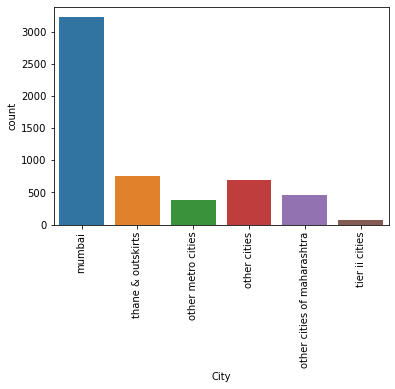

In [12]:
sns.countplot(Lead_df1.City)
xticks(rotation = 90)

In [13]:
## dealing with specialisation column
Lead_df1.Specialization.describe()

count                   5860
unique                    18
top       finance management
freq                     976
Name: Specialization, dtype: object

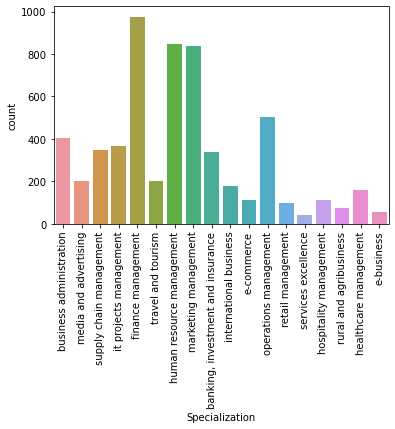

In [14]:
sns.countplot(Lead_df1.Specialization)
xticks(rotation = 90)
plt.show()

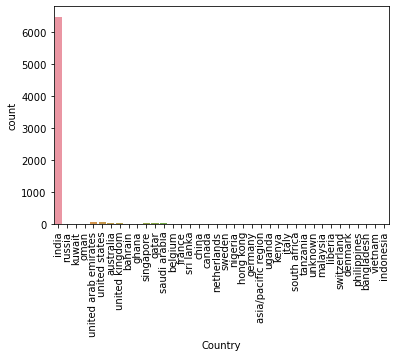

In [15]:
sns.countplot(Lead_df1.Country)
xticks(rotation = 90)
plt.show()

In [16]:
# Dropping colums with more than 35% null values
Lead_df2 = Lead_df1.drop(Lead_df1.loc[:,list(round(100*(Lead_df1.isnull().sum()/len(Lead_df1.index)), 2)>40)].columns, 1)


In [17]:
round(100*(Lead_df2.isnull().sum()/len(Lead_df2.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [18]:
Lead_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [19]:
# Removing all the unnessesary cols
Lead_df2 = Lead_df2.drop(['Tags','City','Lead Number'],axis=1)
Lead_df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [20]:
Lead_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [21]:
# Verifying the proportion of missing values once more
round(100*(Lead_df2.isnull().sum()/len(Lead_df2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [22]:
#Replacing NaN values with 'not provided' to ensure not missing out on major chunk of data

Lead_df2['Specialization'] = Lead_df2['Specialization'].fillna('not provided') 
Lead_df2['What matters most to you in choosing a course'] = Lead_df2['What matters most to you in choosing a course'].fillna('not provided')
Lead_df2['Country'] = Lead_df2['Country'].fillna('not provided')
Lead_df2['What is your current occupation'] = Lead_df2['What is your current occupation'].fillna('not provided')
Lead_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [23]:
# Verifying the proportion of missing values once more
round(100*(Lead_df2.isnull().sum()/len(Lead_df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [24]:
Lead_df2['What matters most to you in choosing a course'].describe()

count                        9240
unique                          4
top       better career prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

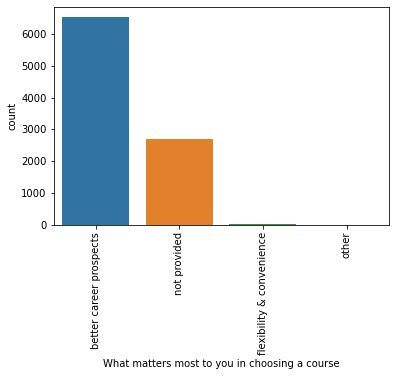

In [25]:
sns.countplot(Lead_df2['What matters most to you in choosing a course'])
xticks(rotation = 90)
plt.show()

In [26]:
Lead_df2["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
south africa               4
kuwait                     4
canada                     4
nigeria                    4
germany                    4
sweden                     3
netherlands                2
belgium                    2
italy                      2
uganda                     2
asia/pacific region        2
china                      2
philippines                2
ghana                      2
bangladesh                 2
indonesia                  1
sri lanka                  1
switzerland                1
vietnam                    1
malaysia                   1
tanzania      

In [27]:
# We shall group the remaining values together as "outside India" since a sizable portion of leads are produced in India. We'll write a method to do that.
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

Lead_df2['Country'] = Lead_df2.apply(lambda x:slots(x['Country']), axis = 1)
Lead_df2['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [28]:
# Rechecking the percentage of missing values
round(100*(Lead_df2.isnull().sum()/len(Lead_df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [29]:
# calculating the percentage of loss after removing the null values
round(100*(sum(Lead_df2.isnull().sum(axis=1) > 1)/Lead_df2.shape[0]),2)

1.48

In [30]:
Lead_df3 = Lead_df2[Lead_df2.isnull().sum(axis=1) <1]

In [31]:
# Code to determine how many rows are remaining in %
round(100*(Lead_df3.shape[0])/(Lead_df.shape[0]),2)

98.2

In [32]:
# Rechecking the percentage of missing values
round(100*(Lead_df3.isnull().sum()/len(Lead_df3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [33]:
# removing ID values because they are all unique
Lead_df_final = Lead_df3.drop('Prospect ID',1)
Lead_df_final.shape

(9074, 21)

# Step 3: Exploratory Data Analysis

## Univariate Analysis

### Categorical Variables

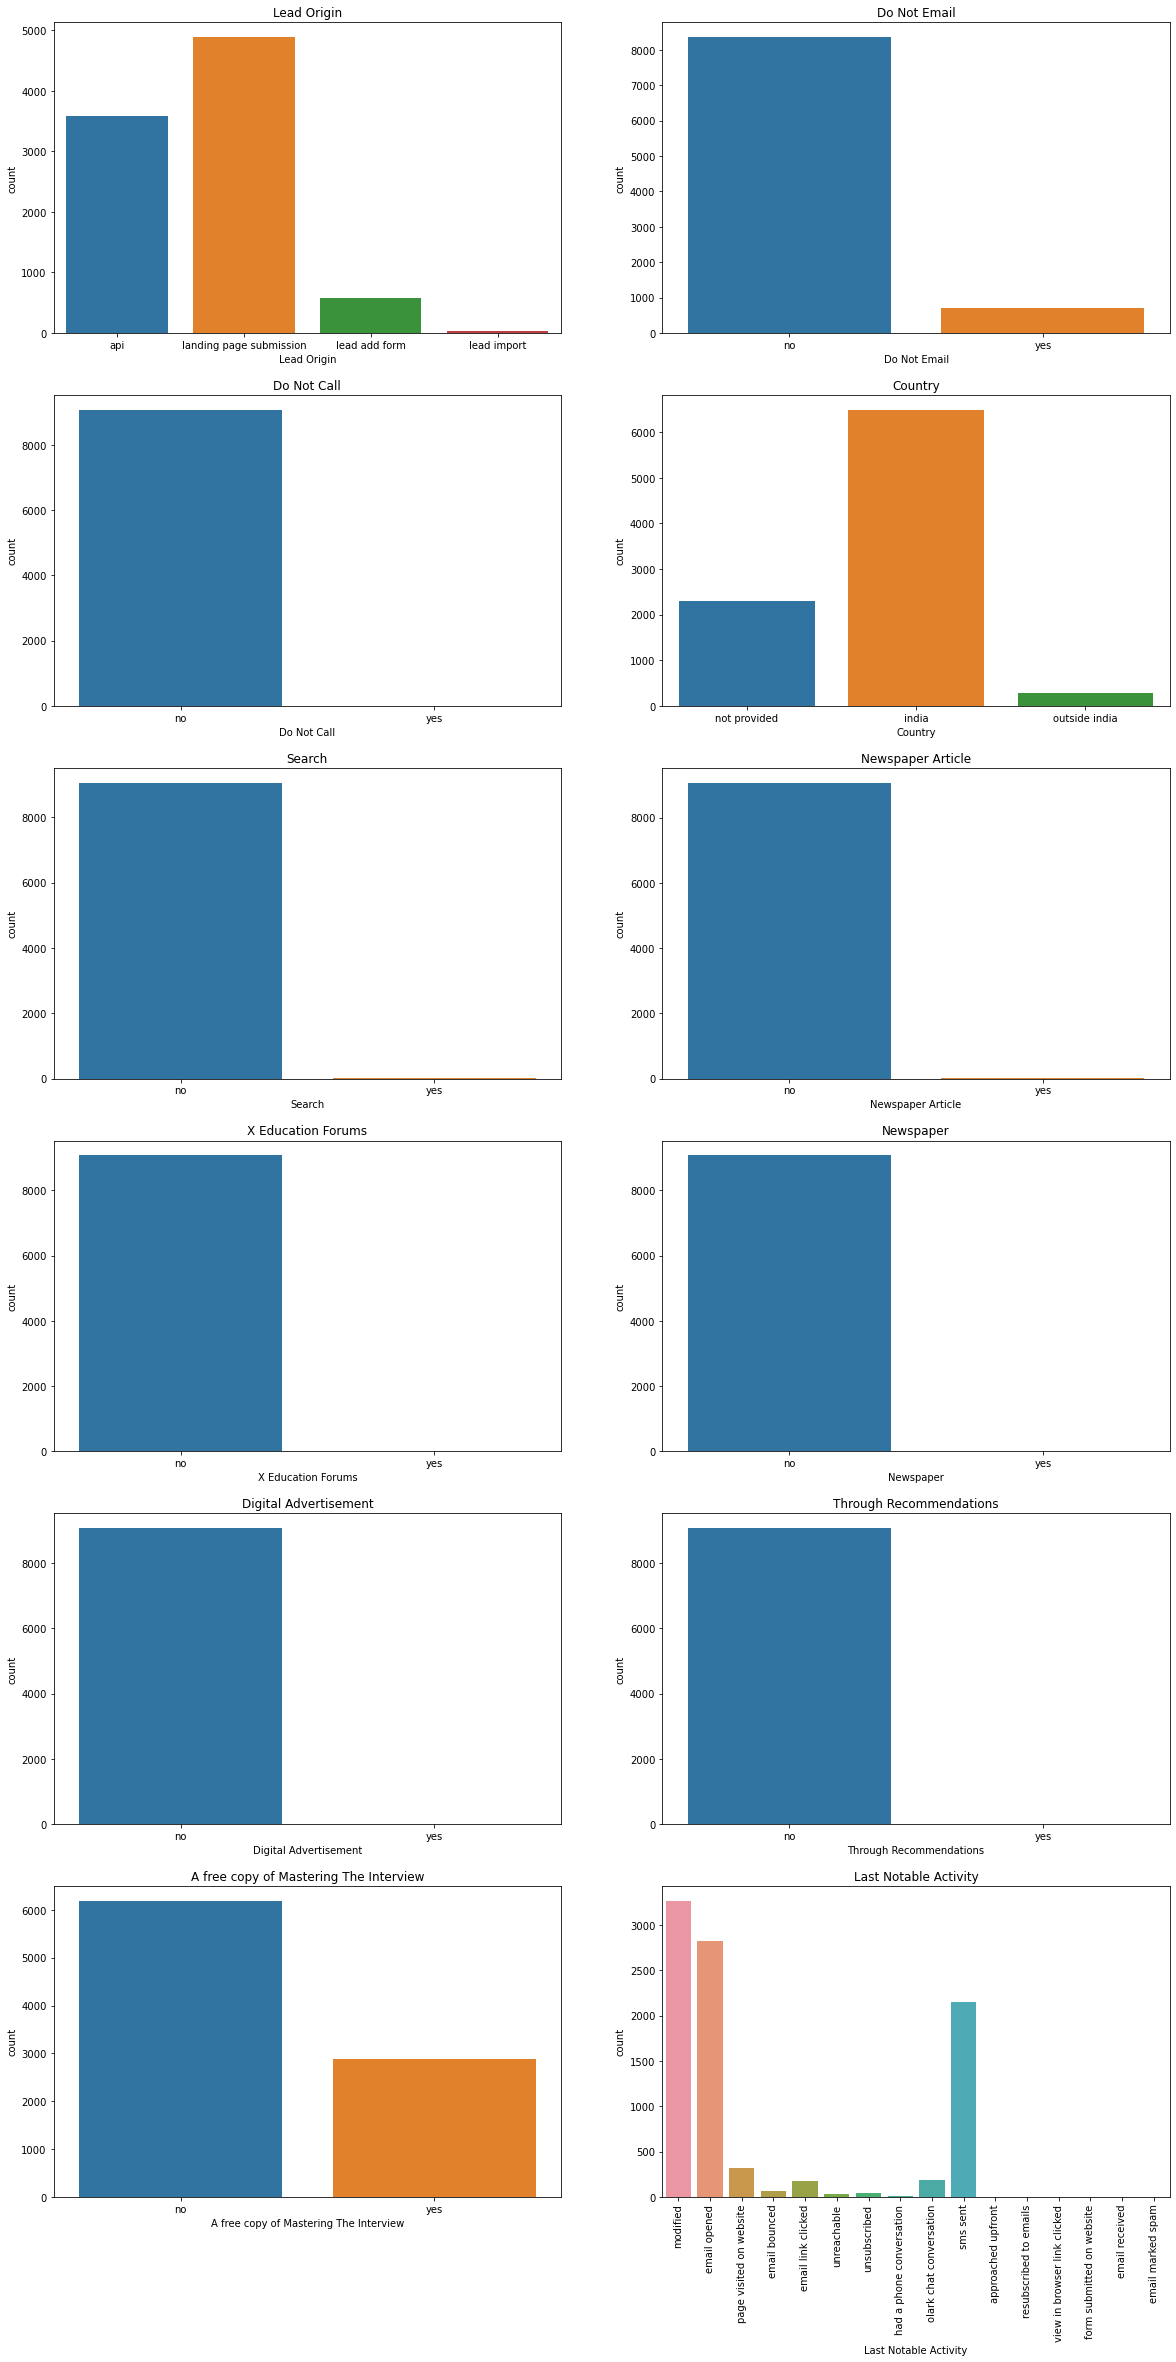

In [34]:
# Creating a plot for each categorical variable
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(Lead_df_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(Lead_df_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(Lead_df_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(Lead_df_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(Lead_df_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(Lead_df_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(Lead_df_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(Lead_df_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(Lead_df_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(Lead_df_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(Lead_df_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(Lead_df_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

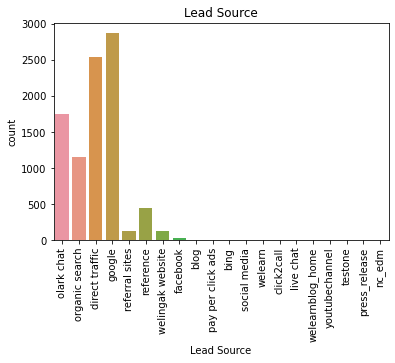

In [35]:
sns.countplot(Lead_df_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

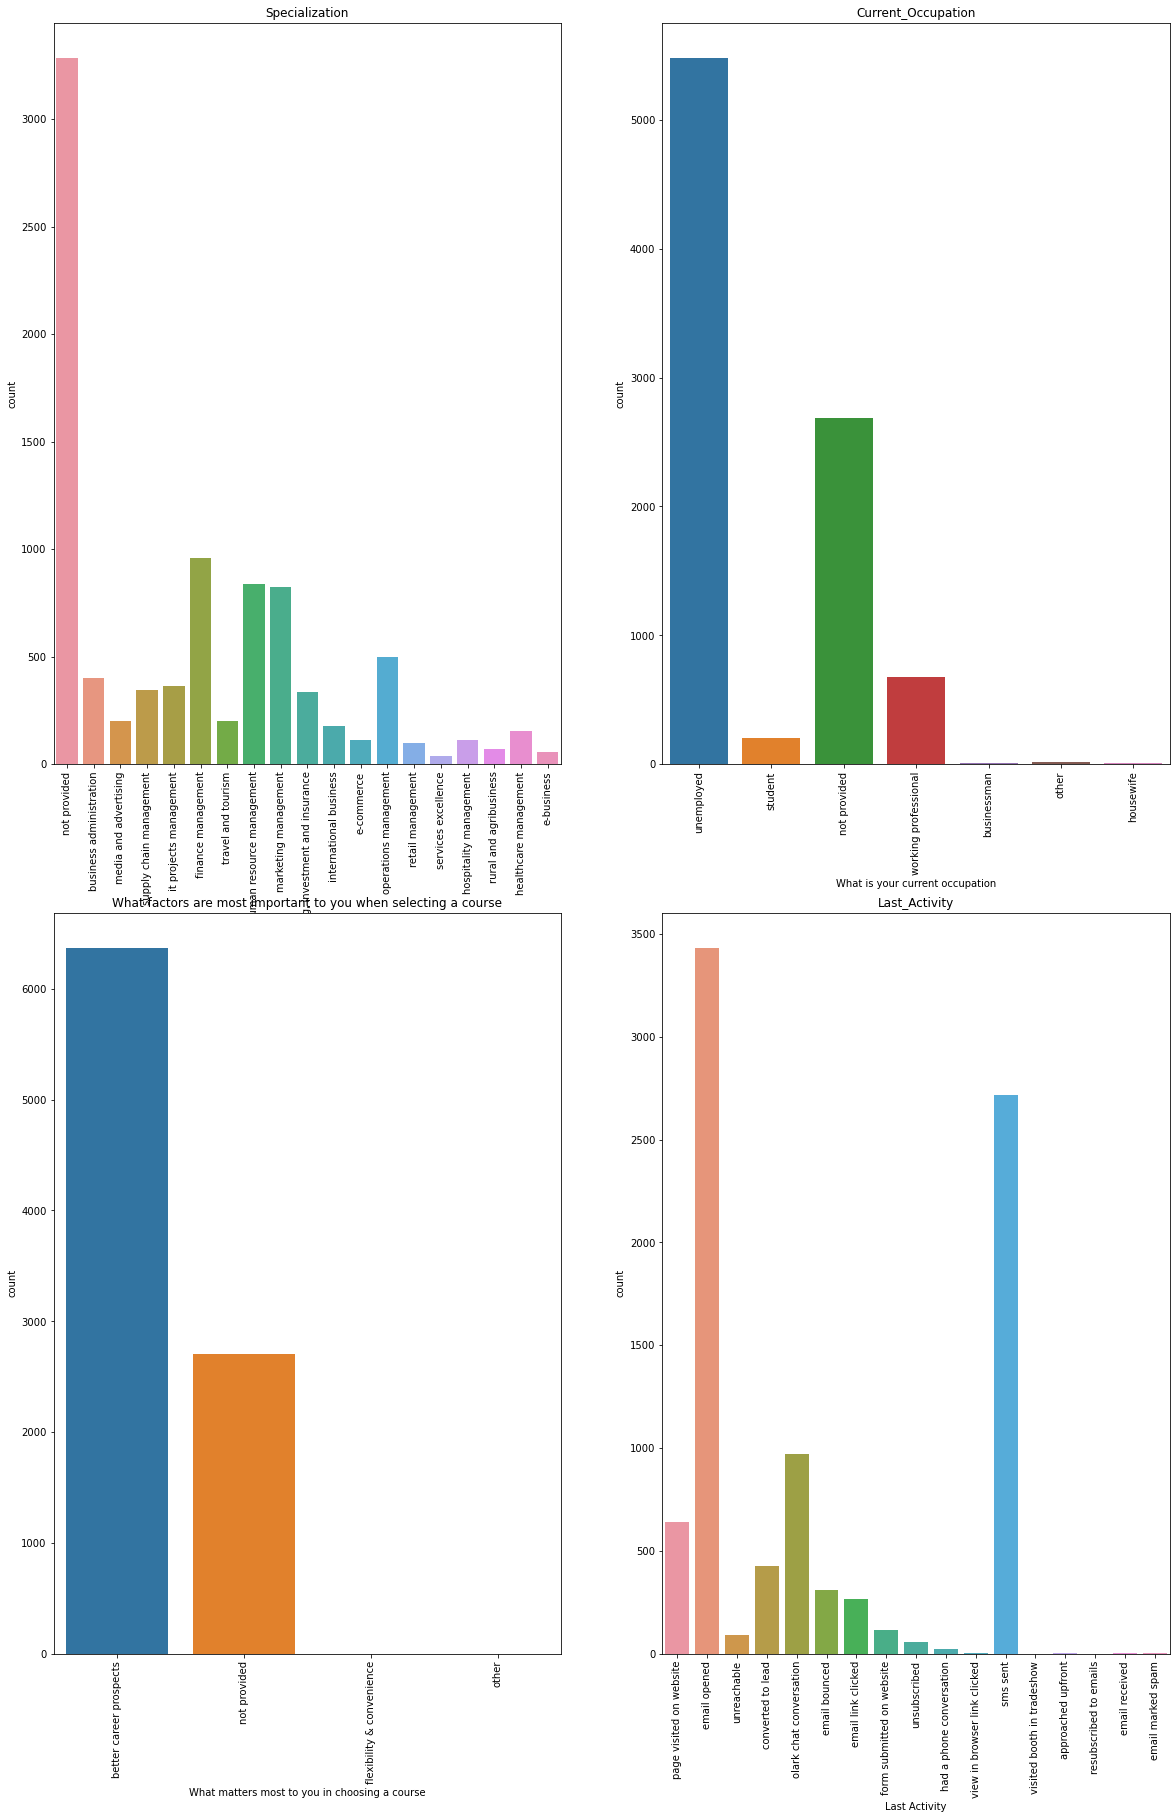

In [36]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(Lead_df_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(Lead_df_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current_Occupation')
plt.subplot(2,2,3)
sns.countplot(Lead_df_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What factors are most important to you when selecting a course')
plt.subplot(2,2,4)
sns.countplot(Lead_df_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last_Activity')
plt.show()

### Numeric Variables

In [37]:
Lead_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

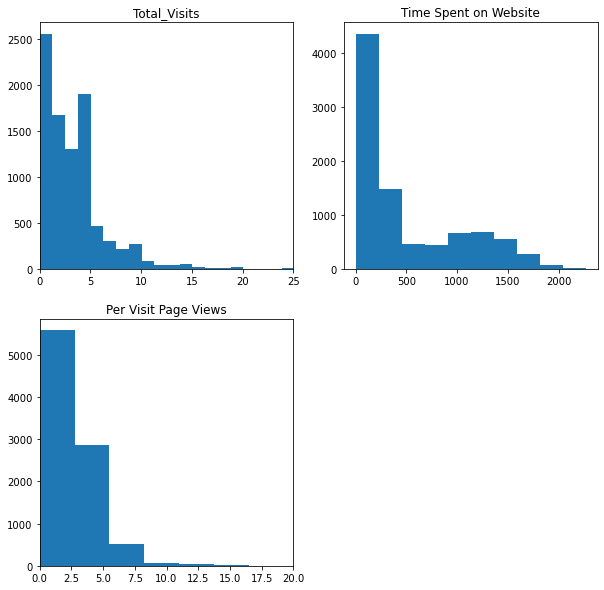

In [38]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(Lead_df_final['TotalVisits'], bins = 200)
plt.title('Total_Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(Lead_df_final['Total Time Spent on Website'], bins = 10)
plt.title('Time Spent on Website')

plt.subplot(223)
plt.hist(Lead_df_final['Page Views Per Visit'], bins = 20)
plt.title('Per Visit Page Views')
plt.xlim(0,20)
plt.show()

## Relating the variables to the Target variable (Converted)

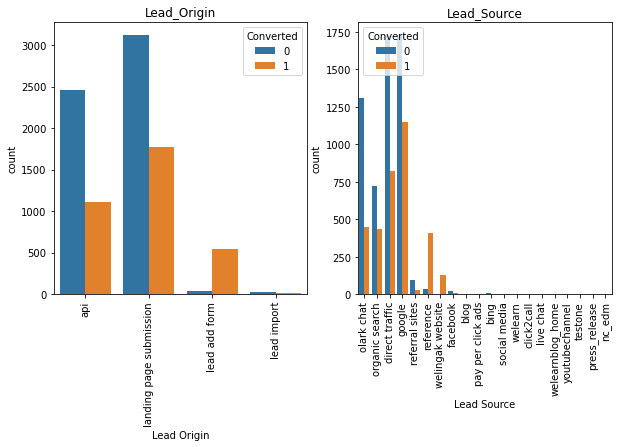

In [39]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead_Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead_Source')
plt.show()

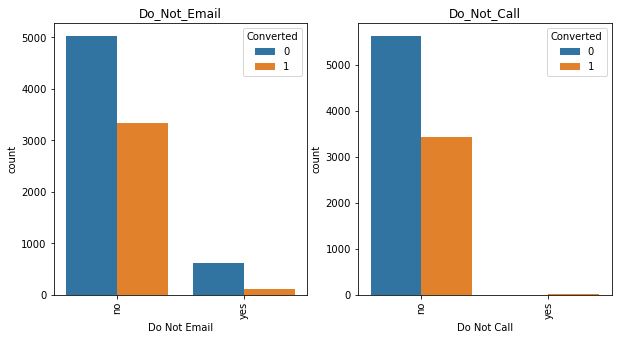

In [40]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Do_Not_Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Do_Not_Call')
plt.show()

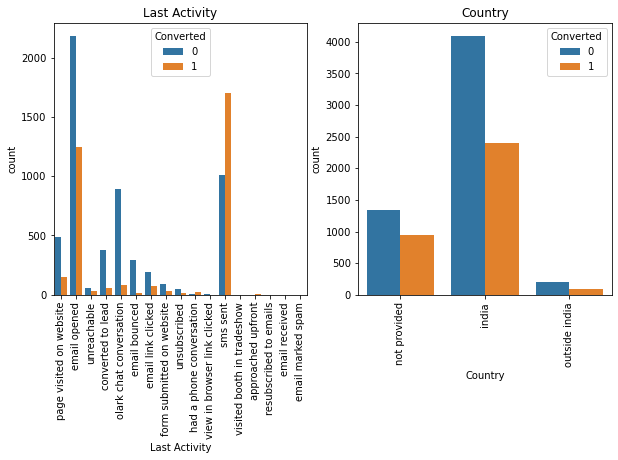

In [41]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

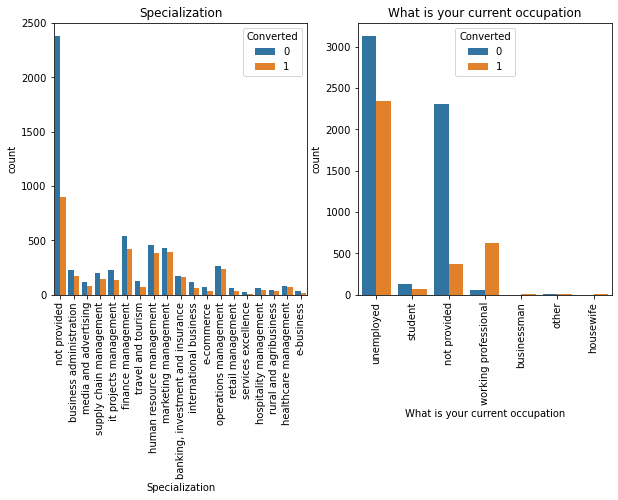

In [42]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

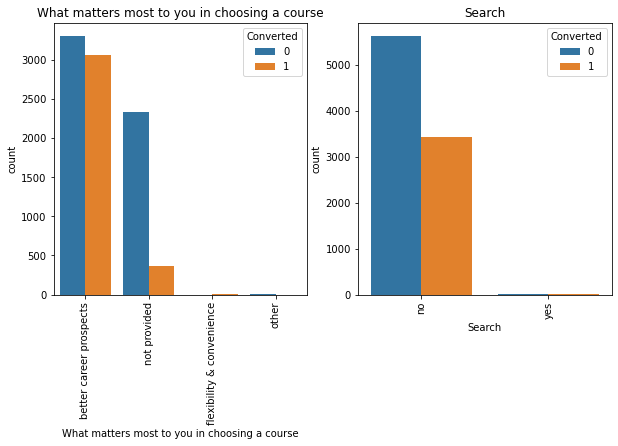

In [43]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

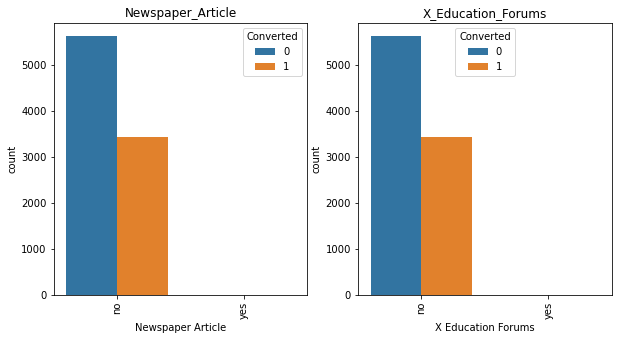

In [44]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper_Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('X_Education_Forums')
plt.show()

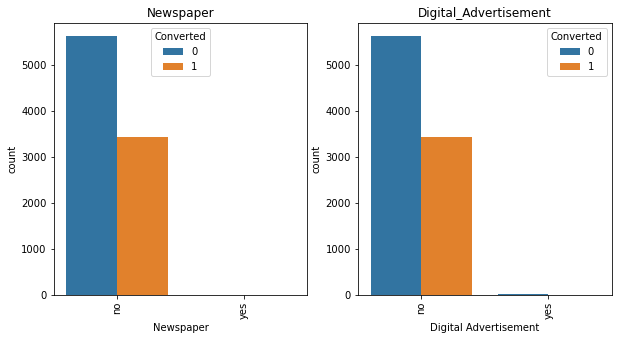

In [46]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital_Advertisement')
plt.show()

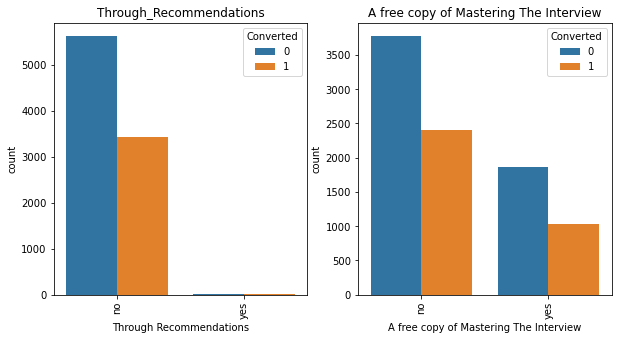

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Through_Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

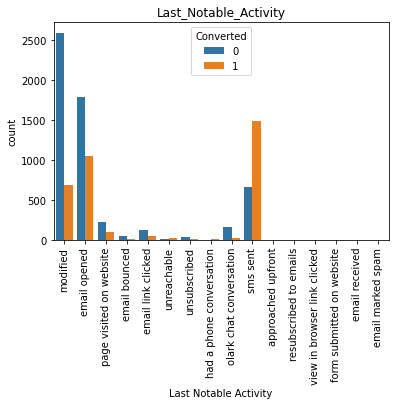

In [48]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Last_Notable_Activity')
plt.show()

## Correlation

In [49]:
# To check the correlation among varibles
Lead_df_final.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000


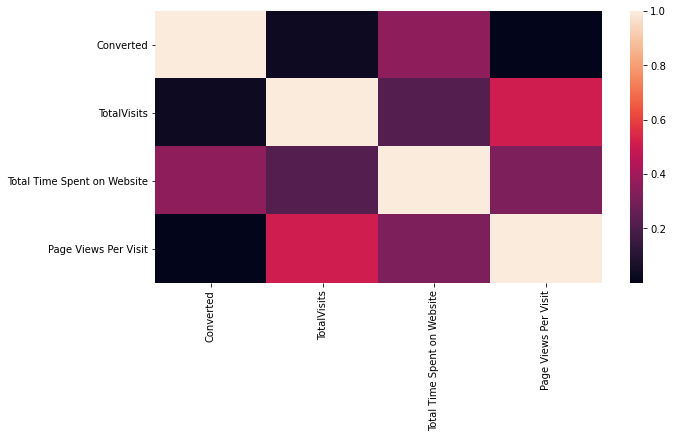

In [50]:
# Heatmap to compare variable correlation
plt.figure(figsize=(10,5))
sns.heatmap(Lead_df_final.corr())
plt.show()

## Verifying Outliers

In [51]:
nums = Lead_df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
nums.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


There doesn't seem to be any outliers in the given data.

# Step 4 : Data Preparation

## Dummy Variables

In [52]:
Lead_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [53]:
Lead_df_final.loc[:, Lead_df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [54]:
# Create dummy data variables using the 'get_dummies'
dummy_data = pd.get_dummies(Lead_df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
Lead_df_final_dum = pd.concat([Lead_df_final, dummy_data], axis=1)
Lead_df_final_dum.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0


In [55]:
Lead_df_final_dum = Lead_df_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
Lead_df_final_dum.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Step 5: Test-Train split

In [56]:
A = Lead_df_final_dum.drop(['Converted'], 1)
A.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [57]:

B = Lead_df_final_dum['Converted']
B.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [58]:
# Split the dataset into 70% and 30% for train and test respectively
A_train, A_test, B_train, B_test = train_test_split(A, B, train_size=0.7, test_size=0.3, random_state=10)

In [59]:
# Scale the three numeric features
scaler = MinMaxScaler()
A_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(A_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
A_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


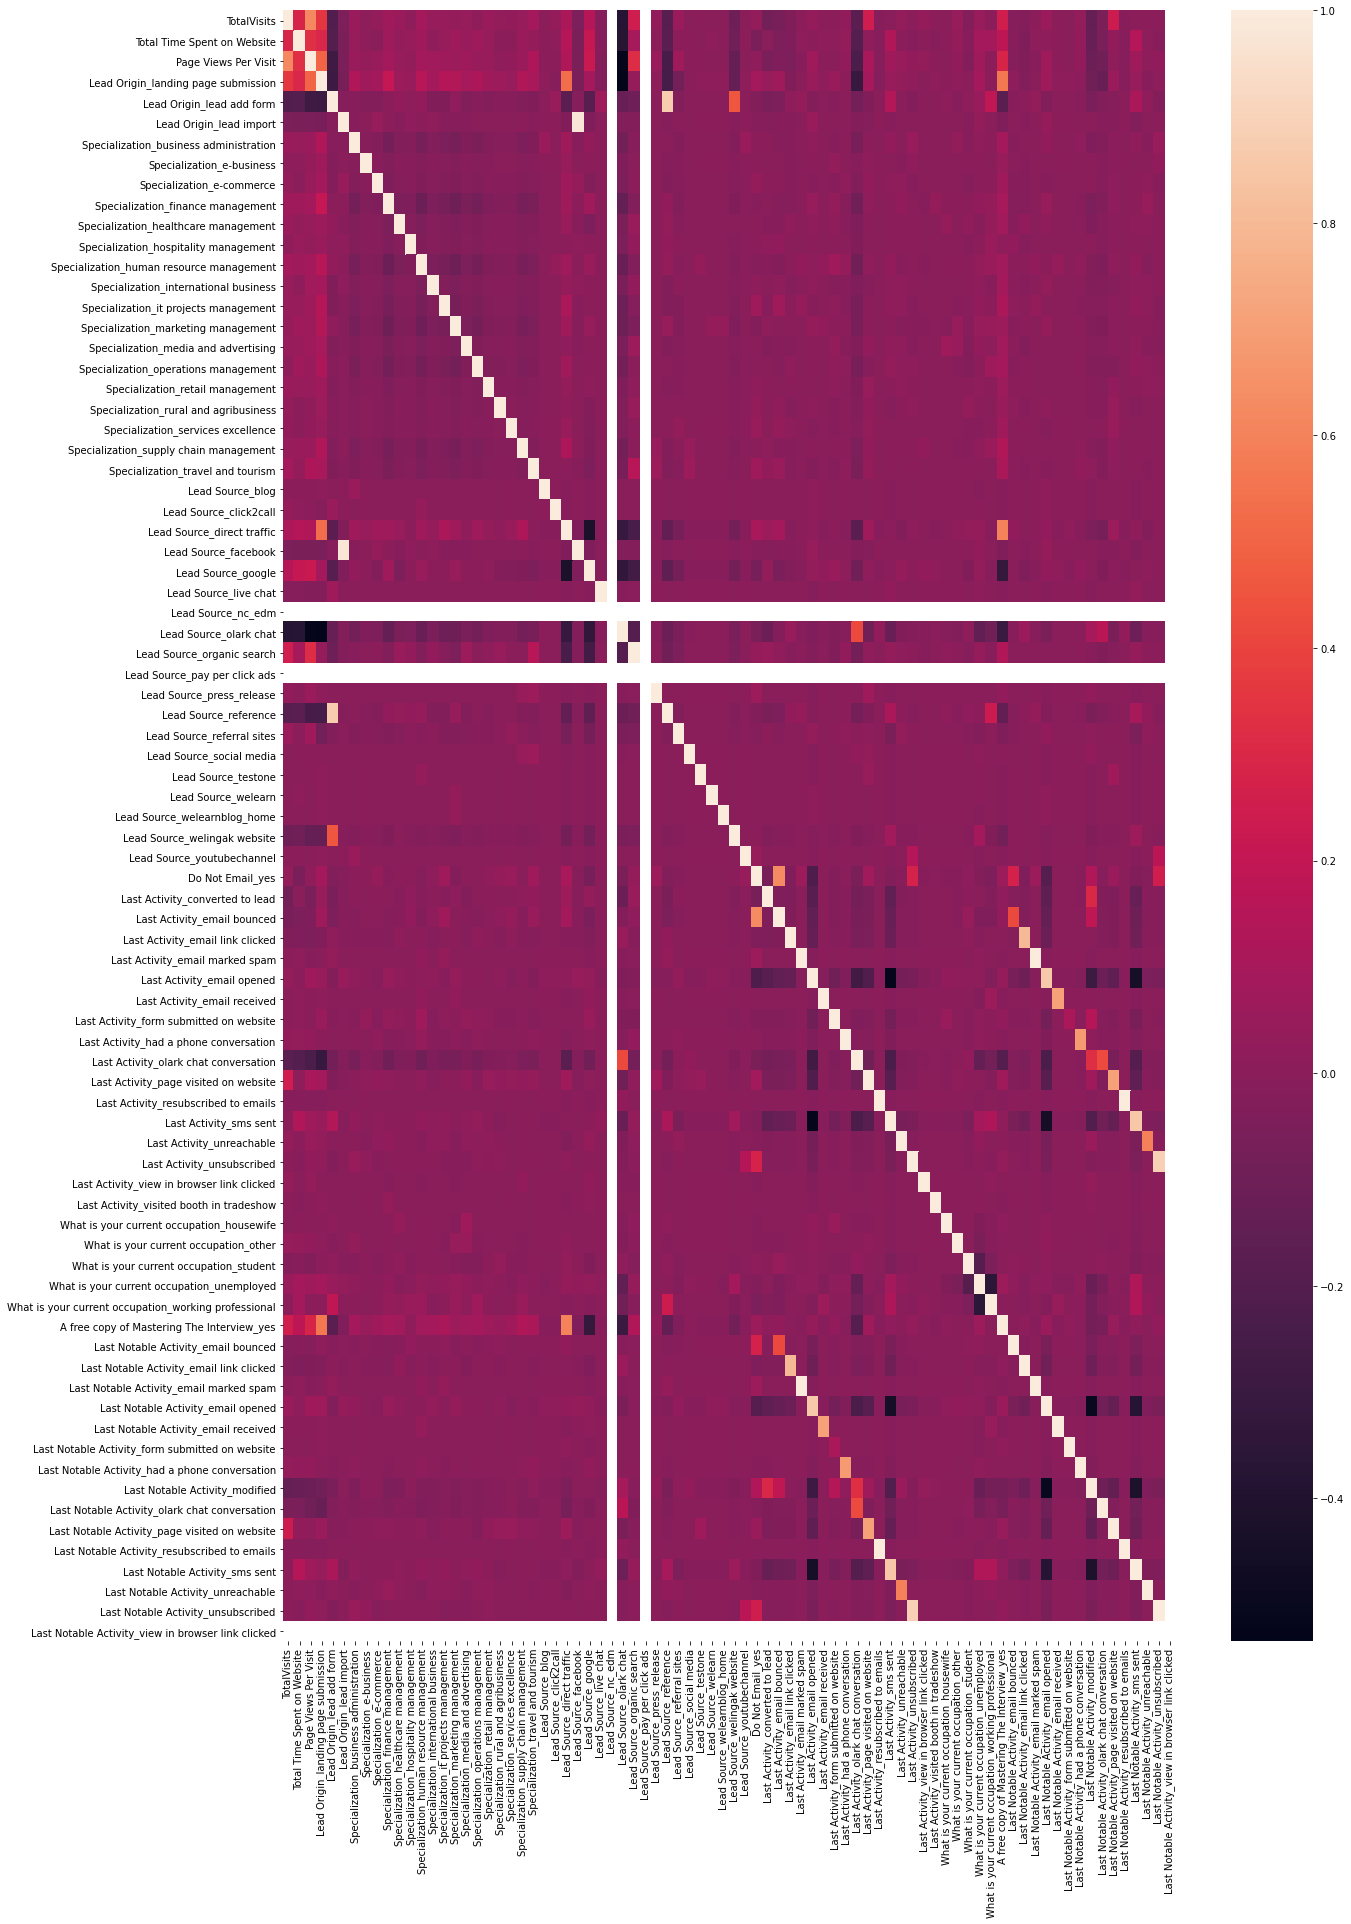

In [60]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(A_train.corr())
plt.show()

# Step 6: Model Building

In [61]:
logreg = LogisticRegression()

In [62]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(A_train, B_train)

In [63]:
# Features that have been selected by RFE
list(zip(A_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 26),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 40),
 ('Specialization_business administration', False, 33),
 ('Specialization_e-business', False, 32),
 ('Specialization_e-commerce', False, 23),
 ('Specialization_finance management', False, 30),
 ('Specialization_healthcare management', False, 25),
 ('Specialization_hospitality management', False, 45),
 ('Specialization_human resource management', False, 31),
 ('Specialization_international business', False, 37),
 ('Specialization_it projects management', False, 28),
 ('Specialization_marketing management', False, 22),
 ('Specialization_media and advertising', False, 42),
 ('Specialization_operations management', False, 27),
 ('Specialization_retail management', False, 63),
 ('Specialization_rural and agribusiness', False, 24),
 ('Specialization_serv

In [64]:
A_train.columns[rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')

In [65]:
# Put all the columns selected by RFE in the variable 'col'
col = A_train.columns[rfe.support_]

In [66]:
# Selecting columns selected by RFE
A_train = A_train[col]

In [67]:
A_train_sm = sm.add_constant(A_train)
logm1 = sm.GLM(B_train, A_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Tue, 18 Oct 2022   Deviance:                       5270.1
Time:                        18:43:46   Pearson chi2:                 6.48e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4876      0.114    -30.661      0.000      -3.711      -3.265
TotalVisits                                              5.4367      1.437      3.782      0.000       2.619       8.254
Total Time Spent on Website                              4.6247      0.167     27.689      0.000       4.297       4.952
Lead Origin_lead add form                                3.7433      0.225     16.616      0.000       3.302       4.185
Lead Source_olark chat                                   1.5954      0.112     14.288      0.000       1.377       1.814
Lead Source_welingak website                             2.5982      1.033      2.515      0.012       0.574       4.623
Do Not Email_yes                                        -1.4275      0.170     -8.376      0.000      -1.762      -1.093
Last Activity_olark chat conversation                   -1.3875      0.168     -8.281      0.000      -1.716      -1.059
Last Activity_sms sent                                   1.2834      0.074     17.331      0.000       1.138       1.428
What is your current occupation_housewife               25.4080   3.09e+04      0.001      0.999   -6.05e+04    6.06e+04
What is your current occupation_other                    2.1868      0.755      2.895      0.004       0.706       3.667
What is your current occupation_student                  1.2705      0.227      5.604      0.000       0.826       1.715
What is your current occupation_unemployed               1.1800      0.086     13.680      0.000       1.011       1.349
What is your current occupation_working professional     3.7057      0.205     18.098      0.000       3.304       4.107
Last Notable Activity_had a phone conversation          24.0110   2.17e+04      0.001      0.999   -4.25e+04    4.26e+04
Last Notable Activity_unreachable                        1.8344      0.601      3.051      0.002       0.656       3.013
========================================================================================================================
"""

In [68]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = A_train.columns
vif['VIF'] = [variance_inflation_factor(A_train.values, i) for i in range(A_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.07
0,TotalVisits,1.85
2,Lead Origin_lead add form,1.59
7,Last Activity_sms sent,1.54
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
12,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


 Removing 'Last Notable Activity had a phone conversation' due to high p-value and low vif

In [69]:
A_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [70]:
# Refit the model with the new set of features
A_train_sm = sm.add_constant(A_train)
logm2 = sm.GLM(B_train, A_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.8
Date:                Tue, 18 Oct 2022   Deviance:                       5285.6
Time:                        18:43:46   Pearson chi2:                 6.48e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4831      0.114    -30.629      0.000      -3.706      -3.260
TotalVisits                                              5.6046      1.450      3.866      0.000       2.763       8.446
Total Time Spent on Website                              4.6104      0.167     27.675      0.000       4.284       4.937
Lead Origin_lead add form                                3.7375      0.225     16.591      0.000       3.296       4.179
Lead Source_olark chat                                   1.5910      0.112     14.249      0.000       1.372       1.810
Lead Source_welingak website                             2.5984      1.033      2.516      0.012       0.574       4.623
Do Not Email_yes                                        -1.4324      0.170     -8.409      0.000      -1.766      -1.099
Last Activity_olark chat conversation                   -1.3919      0.168     -8.310      0.000      -1.720      -1.064
Last Activity_sms sent                                   1.2754      0.074     17.245      0.000       1.130       1.420
What is your current occupation_housewife               23.4021   1.14e+04      0.002      0.998   -2.23e+04    2.23e+04
What is your current occupation_other                    2.1799      0.755      2.887      0.004       0.700       3.660
What is your current occupation_student                  1.2690      0.227      5.600      0.000       0.825       1.713
What is your current occupation_unemployed               1.1852      0.086     13.753      0.000       1.016       1.354
What is your current occupation_working professional     3.7035      0.205     18.099      0.000       3.302       4.105
Last Notable Activity_unreachable                        1.8251      0.601      3.036      0.002       0.647       3.003
========================================================================================================================
"""

In [71]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = A_train.columns
vif['VIF'] = [variance_inflation_factor(A_train.values, i) for i in range(A_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_lead add form,1.59
7,Last Activity_sms sent,1.54
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
12,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


Removing 'What is your current occupation housewife' due to high p-value and low vif

In [72]:
A_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [73]:
# Refit the model with the new set of features
A_train_sm = sm.add_constant(A_train)
logm3 = sm.GLM(B_train, A_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.3
Date:                Tue, 18 Oct 2022   Deviance:                       5302.6
Time:                        18:44:22   Pearson chi2:                 6.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4533      0.113    -30.579      0.000      -3.675      -3.232
TotalVisits                                              5.5427      1.444      3.838      0.000       2.712       8.373
Total Time Spent on Website                              4.6048      0.166     27.690      0.000       4.279       4.931
Lead Origin_lead add form                                3.7501      0.225     16.651      0.000       3.309       4.192
Lead Source_olark chat                                   1.5802      0.111     14.187      0.000       1.362       1.798
Lead Source_welingak website                             2.5821      1.033      2.500      0.012       0.558       4.607
Do Not Email_yes                                        -1.4360      0.170     -8.437      0.000      -1.770      -1.102
Last Activity_olark chat conversation                   -1.3974      0.167     -8.348      0.000      -1.725      -1.069
Last Activity_sms sent                                   1.2672      0.074     17.164      0.000       1.123       1.412
What is your current occupation_other                    2.1567      0.755      2.857      0.004       0.677       3.636
What is your current occupation_student                  1.2456      0.226      5.502      0.000       0.802       1.689
What is your current occupation_unemployed               1.1632      0.086     13.582      0.000       0.995       1.331
What is your current occupation_working professional     3.6797      0.204     18.008      0.000       3.279       4.080
Last Notable Activity_unreachable                        1.8153      0.601      3.022      0.003       0.638       2.993
========================================================================================================================
"""

In [74]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = A_train.columns
vif['VIF'] = [variance_inflation_factor(A_train.values, i) for i in range(A_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_lead add form,1.58
7,Last Activity_sms sent,1.53
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
11,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


Removing 'What is your current occupation other' due to high p-value and low vif

In [75]:
A_train.drop('What is your current occupation_other', axis = 1, inplace = True)

In [76]:
# Refit the model with the new set of features
A_train_sm = sm.add_constant(A_train)
logm4 = sm.GLM(B_train, A_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.8
Date:                Tue, 18 Oct 2022   Deviance:                       5311.7
Time:                        18:44:24   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4345      0.113    -30.511      0.000      -3.655      -3.214
TotalVisits                                              5.7276      1.459      3.926      0.000       2.868       8.587
Total Time Spent on Website                              4.6142      0.166     27.753      0.000       4.288       4.940
Lead Origin_lead add form                                3.7570      0.225     16.676      0.000       3.315       4.199
Lead Source_olark chat                                   1.5780      0.111     14.159      0.000       1.360       1.796
Lead Source_welingak website                             2.5828      1.033      2.501      0.012       0.558       4.607
Do Not Email_yes                                        -1.4412      0.170     -8.470      0.000      -1.775      -1.108
Last Activity_olark chat conversation                   -1.3929      0.167     -8.330      0.000      -1.721      -1.065
Last Activity_sms sent                                   1.2616      0.074     17.108      0.000       1.117       1.406
What is your current occupation_student                  1.2218      0.226      5.401      0.000       0.778       1.665
What is your current occupation_unemployed               1.1394      0.085     13.408      0.000       0.973       1.306
What is your current occupation_working professional     3.6555      0.204     17.914      0.000       3.256       4.055
Last Notable Activity_unreachable                        1.8066      0.601      3.008      0.003       0.629       2.984
========================================================================================================================
"""

In [77]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = A_train.columns
vif['VIF'] = [variance_inflation_factor(A_train.values, i) for i in range(A_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_unemployed,2.29
1,Total Time Spent on Website,2.06
0,TotalVisits,1.84
2,Lead Origin_lead add form,1.58
7,Last Activity_sms sent,1.53
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
10,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


All the p-values are less than 0.05 and VIF values are less than 5. Hence the model looks good.

# Step 7: Predicting the train set

In [78]:
# Predicting the probabilities on the train set
B_train_pred = res.predict(A_train_sm)
B_train_pred[:10]

1289    0.648651
3604    0.135107
5584    0.238085
7679    0.135107
7563    0.495064
7978    0.778219
7780    0.169048
7863    0.982785
838     0.772810
708     0.149226
dtype: float64

In [79]:
# Reshaping to an array
B_train_pred = B_train_pred.values.reshape(-1)
B_train_pred[:10]

array([0.64865119, 0.135107  , 0.23808524, 0.135107  , 0.49506379,
       0.77821892, 0.16904797, 0.98278528, 0.77281013, 0.14922632])

In [80]:
# Data frame with given convertion rate and probablity of predicted ones
B_train_pred_final = pd.DataFrame({'Converted':B_train.values, 'Conversion_Prob':B_train_pred})
B_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.648651
1,0,0.135107
2,0,0.238085
3,0,0.135107
4,0,0.495064


In [81]:
# Substituting 0 or 1 with the cut off as 0.5
B_train_pred_final['Predicted'] = B_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
B_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.648651,1
1,0,0.135107,0
2,0,0.238085,0
3,0,0.135107,0
4,0,0.495064,0


# Step 8: Model Evaluation

In [82]:
# Creating confusion matrix 
confusion_2 = metrics.confusion_matrix(B_train_pred_final.Converted, B_train_pred_final.Predicted )
confusion_2

array([[3438,  457],
       [ 748, 1708]], dtype=int64)

In [83]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [84]:
# Check the overall accuracy
metrics.accuracy_score(B_train_pred_final.Converted, B_train_pred_final.Predicted)

0.810266099826799

81% is a pretty good accuracy 

In [85]:
# Substituting the value of true positive
T_P = confusion_2[1,1]
# Substituting the value of true negatives
T_N = confusion_2[0,0]
# Substituting the value of false positives
F_P = confusion_2[0,1] 
# Substituting the value of false negatives
F_N = confusion_2[1,0]

In [86]:
# Calculating the sensitivity
T_P/(T_P+F_N)

0.6954397394136808

In [87]:
# Calculating the specificity
T_N/(T_N+F_P)

0.8826700898587934

With the current cut off of 0.5, we have approximately 81% accuracy, 70% sensitivity, and 87% specificity.

# Step 9: Finding optimum cut-off using ROC curve

To find the best cut-off, compare it to the previous randomly chosen cut-off:

In [88]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC_curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate True Negative Rate')
    plt.ylabel('Rate of True Positives')
    plt.title('Example of a Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( B_train_pred_final.Converted, B_train_pred_final.Conversion_Prob, drop_intermediate = False )

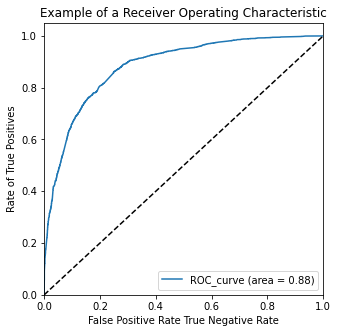

In [90]:
# Call the ROC function
draw_roc(B_train_pred_final.Converted, B_train_pred_final.Conversion_Prob)

The area under the ROC curve is 0.88, which is an excellent value.

In [91]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    B_train_pred_final[i]= B_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
B_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.648651,1,1,1,1,1,1,1,1,0,0,0
1,0,0.135107,0,1,1,0,0,0,0,0,0,0,0
2,0,0.238085,0,1,1,1,0,0,0,0,0,0,0
3,0,0.135107,0,1,1,0,0,0,0,0,0,0,0
4,0,0.495064,0,1,1,1,1,1,0,0,0,0,0


In [92]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_data = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making a perplexing matrix to find sensitivity, accuracy, and specificity values for each level of probability
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(B_train_pred_final.Converted, B_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_data.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_data

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.577547,0.983713,0.321438
0.2,0.2,0.758463,0.913681,0.660591
0.3,0.3,0.788380,0.872557,0.735302
0.4,0.4,0.809321,0.764658,0.837484
0.5,0.5,0.810266,0.695440,0.882670
0.6,0.6,0.802551,0.627443,0.912965
0.7,0.7,0.772792,0.501629,0.943774
0.8,0.8,0.753110,0.413274,0.967394
0.9,0.9,0.706345,0.259772,0.987933


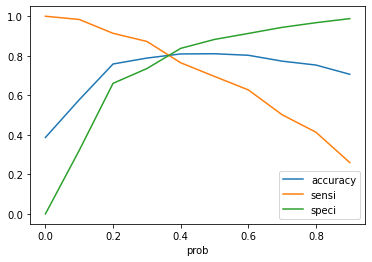

In [93]:
# Plotting it
cutoff_data.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph, it is evident that the optimum cut-off is 0.35

In [94]:
B_train_pred_final['final_predicted'] = B_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
B_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.648651,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.238085,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495064,0,1,1,1,1,1,0,0,0,0,0,1


In [95]:
# Check the overall accuracy
metrics.accuracy_score(B_train_pred_final.Converted, B_train_pred_final.final_predicted)

0.8031806014800819

In [96]:
# Creating confusion matrix 
confusion1 = metrics.confusion_matrix(B_train_pred_final.Converted, B_train_pred_final.final_predicted )
confusion1

array([[3126,  769],
       [ 481, 1975]], dtype=int64)

In [99]:
# Substituting the value of true positive
T_P = confusion1[1,1]
# Substituting the value of true negatives
T_N = confusion1[0,0]
# Substituting the value of false positives
F_P = confusion1[0,1] 
# Substituting the value of false negatives
F_N = confusion1[1,0]

In [100]:
# Calculating the sensitivity
T_P/(T_P+F_N)

0.8041530944625407

In [101]:
# Calculating the specificity
T_N/(T_N+F_P)

0.8025673940949936

Now we can see that, with a cut off of 0.35, we have accuracy, Sensitivity and Specificity all around 80%

# Step 10: Prediction on Test set

In [102]:
# Scaling numeric values
A_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(A_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [103]:
# Substituting all the columns in the final train model
col = A_train.columns

In [104]:
# Select the columns in A_train for A_test as well
A_test = A_test[col]
# Add a constant to A_test
A_test_sm = sm.add_constant(A_test[col])
A_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,0,0,0,0,0,0,0,1,0,0
7212,1.0,0.028369,0.001320,0,0,0,0,0,1,0,0,1,0
2085,1.0,0.000000,0.000000,1,0,1,0,0,0,0,1,0,0
4048,1.0,0.028369,0.617077,0,0,0,0,0,1,0,1,0,0
4790,1.0,0.028369,0.005282,0,0,0,0,0,0,0,1,0,0


In [105]:
# Storing prediction of test set in the variable 'y_test_pred'
B_test_pred = res.predict(A_test_sm)
# Coverting it to dataframe
B_pred_data = pd.DataFrame(B_test_pred)
# Converting y_test to dataframe
B_test_data = pd.DataFrame(B_test)
# Remove index for both dataframes to append them side by side 
B_pred_data.reset_index(drop=True, inplace=True)
B_test_data.reset_index(drop=True, inplace=True)
# Append y_test_data and y_pred_data
B_pred_final = pd.concat([B_test_data, B_pred_data],axis=1)
# Renaming column 
B_pred_final= B_pred_final.rename(columns = {0 : 'Conversion_Prob'})
B_pred_final.head()

,Converted,Conversion_Prob
0,0,0.457908
1,1,0.839048
2,1,0.982785
3,1,0.878283
4,0,0.108296


In [106]:
# Making prediction using cut off 0.35
B_pred_final['final_predicted'] = B_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
B_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.457908,1
1,1,0.839048,1
2,1,0.982785,1
3,1,0.878283,1
4,0,0.108296,0


In [107]:
# Check the overall accuracy
metrics.accuracy_score(B_pred_final['Converted'], B_pred_final.final_predicted)

0.8094013955196474

In [108]:
# Creating confusion matrix 
confusion1 = metrics.confusion_matrix(B_pred_final['Converted'], B_pred_final.final_predicted )
confusion1

array([[1406,  338],
       [ 181,  798]], dtype=int64)

In [112]:
# Substituting the value of true positive
T_P = confusion1[1,1]
# Substituting the value of true negatives
T_N = confusion1[0,0]
# Substituting the value of false positives
F_P = confusion1[0,1] 
# Substituting the value of false negatives
F_N = confusion1[1,0]

In [113]:
# Calculating the sensitivity
T_P/(T_P+F_N)

0.81511746680286

In [114]:
# Calculating the specificity
T_N/(T_N+F_P)

0.8061926605504587

With the current cut-off of 0.35, the accuracy, sensitivity and specificity all are coming around 81%

# Step 11:Precision & Recall 

In [115]:
confusion_2 = metrics.confusion_matrix(B_train_pred_final.Converted, B_train_pred_final.Predicted )
confusion_2

array([[3438,  457],
       [ 748, 1708]], dtype=int64)

In [116]:
# Precision = TP / TP + FP
confusion_2[1,1]/(confusion_2[0,1]+confusion_2[1,1])

0.7889145496535797

In [117]:
#Recall = TP / TP + FN
confusion_2[1,1]/(confusion_2[1,0]+confusion_2[1,1])

0.6954397394136808

With the current cut-off as 0.35, the precision is coming around 79% and Recall around 70%

## Precision & Recall Trade-off

In [118]:
B_train_pred_final.Converted, B_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [119]:
p, r, thresholds = precision_recall_curve(B_train_pred_final.Converted, B_train_pred_final.Conversion_Prob)

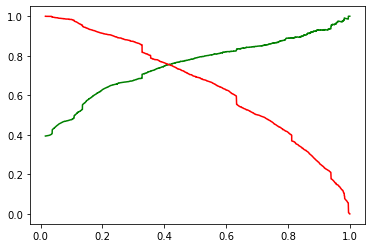

In [120]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [121]:
B_train_pred_final['final_predicted'] = B_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
B_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.648651,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.238085,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495064,0,1,1,1,1,1,0,0,0,0,0,1


In [122]:
# Accuracy
metrics.accuracy_score(B_train_pred_final.Converted, B_train_pred_final.final_predicted)

0.8112108329396945

In [123]:
# Creating confusion matrix again
confusion1 = metrics.confusion_matrix(B_train_pred_final.Converted, B_train_pred_final.final_predicted )
confusion1

array([[3289,  606],
       [ 593, 1863]], dtype=int64)

In [125]:
# Substituting the value of true positive
T_P = confusion1[1,1]
# Substituting the value of true negatives
T_N = confusion1[0,0]
# Substituting the value of false positives
F_P = confusion1[0,1] 
# Substituting the value of false negatives
F_N = confusion1[1,0]

In [126]:
# Precision = TP / TP + FP
T_P / (T_P + F_P)

0.7545565006075334

In [127]:
#Recall = TP / TP + FN
T_P / (T_P + F_N)

0.7585504885993485

With the current cut-off at 0.41, Precision and Scale is coming around 75%

# Step 12: Prediction on Test set

In [128]:
# Storing prediction of test set in the variable 'y_test_pred'
B_test_pred = res.predict(A_test_sm)
# Coverting it to datafram
B_pred_data = pd.DataFrame(B_test_pred)
# Converting y_test to dataframe
B_test_data = pd.DataFrame(B_test)
# Remove index for both dataframes to append them side by side 
B_pred_data.reset_index(drop=True, inplace=True)
B_test_data.reset_index(drop=True, inplace=True)
# Append y_test_data and y_pred_data
B_pred_final = pd.concat([B_test_data, B_pred_data],axis=1)
# Renaming column 
B_pred_final= B_pred_final.rename(columns = {0 : 'Conversion_Prob'})
B_pred_final.head()

,Converted,Conversion_Prob
0,0,0.457908
1,1,0.839048
2,1,0.982785
3,1,0.878283
4,0,0.108296


In [129]:
# Making prediction using cut off 0.41
B_pred_final['final_predicted'] = B_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
B_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.457908,1
1,1,0.839048,1
2,1,0.982785,1
3,1,0.878283,1
4,0,0.108296,0


In [130]:
# Check the overall accuracy
metrics.accuracy_score(B_pred_final['Converted'], B_pred_final.final_predicted)

0.8149100257069408

In [131]:
# Creating confusion matrix 
confusion1 = metrics.confusion_matrix(B_pred_final['Converted'], B_pred_final.final_predicted )
confusion1

array([[1472,  272],
       [ 232,  747]], dtype=int64)

In [132]:
# Substituting the value of true positive
T_P = confusion1[1,1]
# Substituting the value of true negatives
T_N = confusion1[0,0]
# Substituting the value of false positives
F_P = confusion1[0,1] 
# Substituting the value of false negatives
F_N = confusion1[1,0]

In [133]:
# Precision = TP / TP + FP
T_P / (T_P + F_P)

0.7330716388616291

In [134]:
#Recall = TP / TP + FN
T_P / (T_P + FN)

0.5574626865671641

With the current cut-off at 0.41, Precision and Recall is coming aroung 73% and 76% respectively

# Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 
Accuracy : 80%
Sensitivity : 77%
Specificity : 80%
Test Data: 
Accuracy : 80%
Sensitivity : 77%
Specificity : 80% 




The model seems to be performing well. The ROC curve has a value of 0.85, which is a decent value. 

'''

# Conclusion

It was found that the variables that mattered the most in the potential buyers are (In descending order):

1. The total time spend on the Website.
2. Total number of visits.
3. When the lead source was:
           a. Lead add form
           b. Olark Chat
4. When the last activity was:
           a. SMS
           b. Olark chat conversation
6. When their current occupation is as a working professional.

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.